<a href="https://colab.research.google.com/github/Darkred69/Predict-Loan-pay-/blob/main/Predict_Loan_Pay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load and cleasing data


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Midterm MindX/Loan_pay|.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346 entries, 0 to 345
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Loan_status     346 non-null    object
 1   Principal       346 non-null    int64 
 2   Terms           346 non-null    int64 
 3   Effective_date  346 non-null    object
 4   Due_date        346 non-null    object
 5   Age             346 non-null    int64 
 6   Education       346 non-null    object
 7   Gender          346 non-null    object
dtypes: int64(3), object(5)
memory usage: 21.8+ KB


In [ ]:
df.isnull().sum()

Loan_status       0
Principal         0
Terms             0
Effective_date    0
Due_date          0
Age               0
Education         0
Gender            0
dtype: int64

In [ ]:
df.head(3)

,Loan_status,Principal,Terms,Effective_date,Due_date,Age,Education,Gender
0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male


## Creata a new column call "Date" to calculate the difference between "Effective_date" and "Due_date"

In [ ]:
df['Effective_date']= pd.to_datetime(df['Effective_date'])
df['Due_date']= pd.to_datetime(df['Due_date'])

In [ ]:
df['Date'] = df['Due_date']- df['Effective_date']

In [ ]:
import datetime
df['Date'] = df['Date'].dt.days


## First model: Encoding 

In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder #Thư viện mã hóa các string
df = df.apply(LabelEncoder().fit_transform) #Mã hóa dữ liệu
df

,Loan_status,Principal,Terms,Effective_date,Due_date,Age,Education,Gender,Date
0,1,4,2,0,11,27,1,1,3
1,1,4,2,0,11,15,0,0,3
2,1,4,1,0,4,9,3,1,2
3,1,4,2,1,12,10,3,0,3
4,1,4,2,1,12,11,3,1,3
...,...,...,...,...,...,...,...,...,...
341,0,2,1,3,7,14,1,1,2
342,0,4,2,3,14,7,1,1,3
343,0,2,1,4,8,21,3,1,2
344,0,4,2,4,21,10,3,1,5


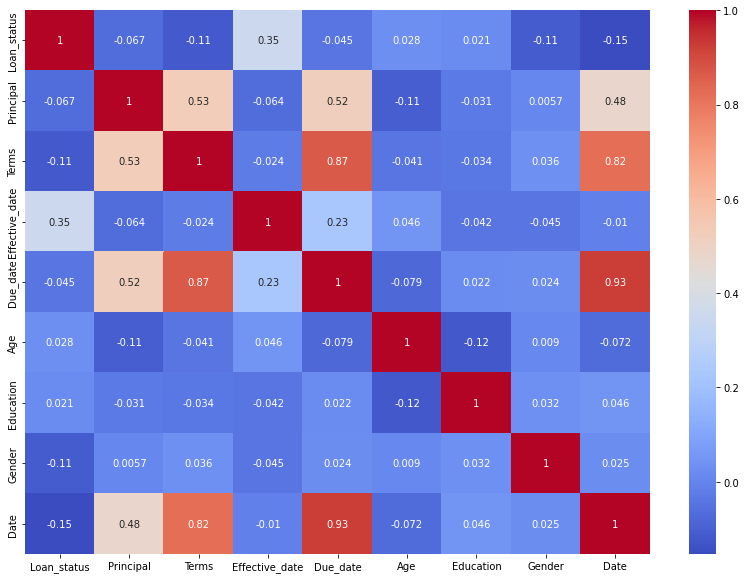

In [ ]:
import seaborn as sns
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

In [ ]:
X_data = df.drop(columns = ['Loan_status',"Due_date",'Effective_date'])
Y_data = df.iloc[:,0:1]
Y_data

,Loan_status
0,1
1,1
2,1
3,1
4,1
...,...
341,0
342,0
343,0
344,0


In [ ]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X_data,Y_data,train_size=0.8)

In [ ]:
from sklearn.linear_model import LogisticRegression #Import mô hình LogisticRegression gán cho biến model
model = LogisticRegression()
model.fit(X_train, y_train)
model.score(X_test,y_test)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7285714285714285

## Second model: Encoding and normalizing data


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler  = MinMaxScaler()
scaler .fit(df)
data_minmax= scaler.transform(df)

In [ ]:
df_minmax = pd.DataFrame(data=data_minmax, columns=['Loan_status','Principle','Terms','Effective_date',"Due_date",'Age','Education','Gender','Date'])
df_minmax

,Loan_status,Principle,Terms,Effective_date,Due_date,Age,Education,Gender,Date
0,1.0,1.0,1.0,0.000000,0.500000,0.870968,0.333333,1.0,0.6
1,1.0,1.0,1.0,0.000000,0.500000,0.483871,0.000000,0.0,0.6
2,1.0,1.0,0.5,0.000000,0.181818,0.290323,1.000000,1.0,0.4
3,1.0,1.0,1.0,0.166667,0.545455,0.322581,1.000000,0.0,0.6
4,1.0,1.0,1.0,0.166667,0.545455,0.354839,1.000000,1.0,0.6
...,...,...,...,...,...,...,...,...,...
341,0.0,0.5,0.5,0.500000,0.318182,0.451613,0.333333,1.0,0.4
342,0.0,1.0,1.0,0.500000,0.636364,0.225806,0.333333,1.0,0.6
343,0.0,0.5,0.5,0.666667,0.363636,0.677419,1.000000,1.0,0.4
344,0.0,1.0,1.0,0.666667,0.954545,0.322581,1.000000,1.0,1.0


In [ ]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X_data,Y_data,train_size=0.8)

In [ ]:
from sklearn.linear_model import LogisticRegression #Import mô hình LogisticRegression gán cho biến model
model = LogisticRegression()
model.fit(X_train, y_train)
model.score(X_test,y_test)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7714285714285715